In [1]:
import pandas as pd

# Load data from a CSV file
Truth = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/Thesis/Final_datasets_used/Codes_WD/ttest_cv_500by300/Truth_umi.csv')

# Remove the first column by index (index 0)
Truth = Truth.drop(Truth.columns[0], axis=1)
#print(Truth.head())



# Remove the first column by index (index 0)
#WAVDesC = WAVDesC.drop(WAVDesC.columns[0], axis=1)


#print(Truth.head())


In [ ]:
################# 500 by 300 cells nonUMI ###############

In [3]:

WAVDesC = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/Thesis/Final_datasets_used/Codes_WD/ttest_cv_500by300/denoised_WavdescBior2.6_nonumi_500.csv',header=None)
print(WAVDesC.shape)

ENHANCE = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/Thesis/Final_datasets_used/Codes_WD/ttest_cv_500by300/denoised_nonUMI_enhance_500.csv',header=None)
#print(ENHANCE.head())
ENHANCE = ENHANCE.drop(ENHANCE.columns[0], axis=1)
ENHANCE = ENHANCE.drop(index=0)
ENHANCE = ENHANCE.apply(pd.to_numeric, errors='coerce')
print(ENHANCE.shape)
#print(ENHANCE.head())
print(type(ENHANCE))



SAVER = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/Thesis/Final_datasets_used/Codes_WD/ttest_cv_500by300/denoised_saver_nonumi_500.csv')
print(SAVER.shape)
SAVER = SAVER.apply(pd.to_numeric, errors='coerce')

#print(SAVER.head())


MAGIC = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/Thesis/Final_datasets_used/Codes_WD/ttest_cv_500by300/denoised_magicData_nonUMI_500.csv',header=None)
MAGIC = MAGIC.T
print(MAGIC.shape)
MAGIC = MAGIC.apply(pd.to_numeric, errors='coerce')

#print(MAGIC.head())

DCA = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/Thesis/Final_datasets_used/Codes_WD/ttest_cv_500by300/dca_denoised_nonUMI_500.tsv',delimiter = '\t')
#print(ENHANCE.head())
DCA = DCA.drop(DCA.columns[0], axis=1)
#DCA = DCA.drop(index=0)
DCA = DCA.apply(pd.to_numeric, errors='coerce')
print(DCA.shape)
#print(ENHANCE.head())
print(type(DCA))


# Remove the first column by index (index 0)
#WAVDesC = WAVDesC.drop(WAVDesC.columns[0], axis=1)


#print(Truth.head())


(500, 300)
(500, 300)
<class 'pandas.core.frame.DataFrame'>
(500, 300)
(500, 300)
(497, 300)
<class 'pandas.core.frame.DataFrame'>


In [4]:
import numpy as np

def rowcvs(matrix):
    # Calculate the mean and standard deviation for each row
    means = np.mean(matrix, axis=1)
    stds = np.std(matrix, axis=1, ddof=1)  # ddof=1 for unbiased estimate
    
    # Calculate the coefficient of variation (CV)
    cvs = stds / means
    return cvs


In [5]:
A= rowcvs(Truth)
B =  rowcvs(WAVDesC)

C = rowcvs(ENHANCE)
D = rowcvs(SAVER)
E = rowcvs(MAGIC)
F= rowcvs(DCA)


print(F)
#print(B)

0      2.270287
1      0.750649
2      0.652960
3      0.741617
4      0.488296
         ...   
492    1.116599
493    0.366119
494    0.624689
495    0.735833
496    0.623441
Length: 497, dtype: float64


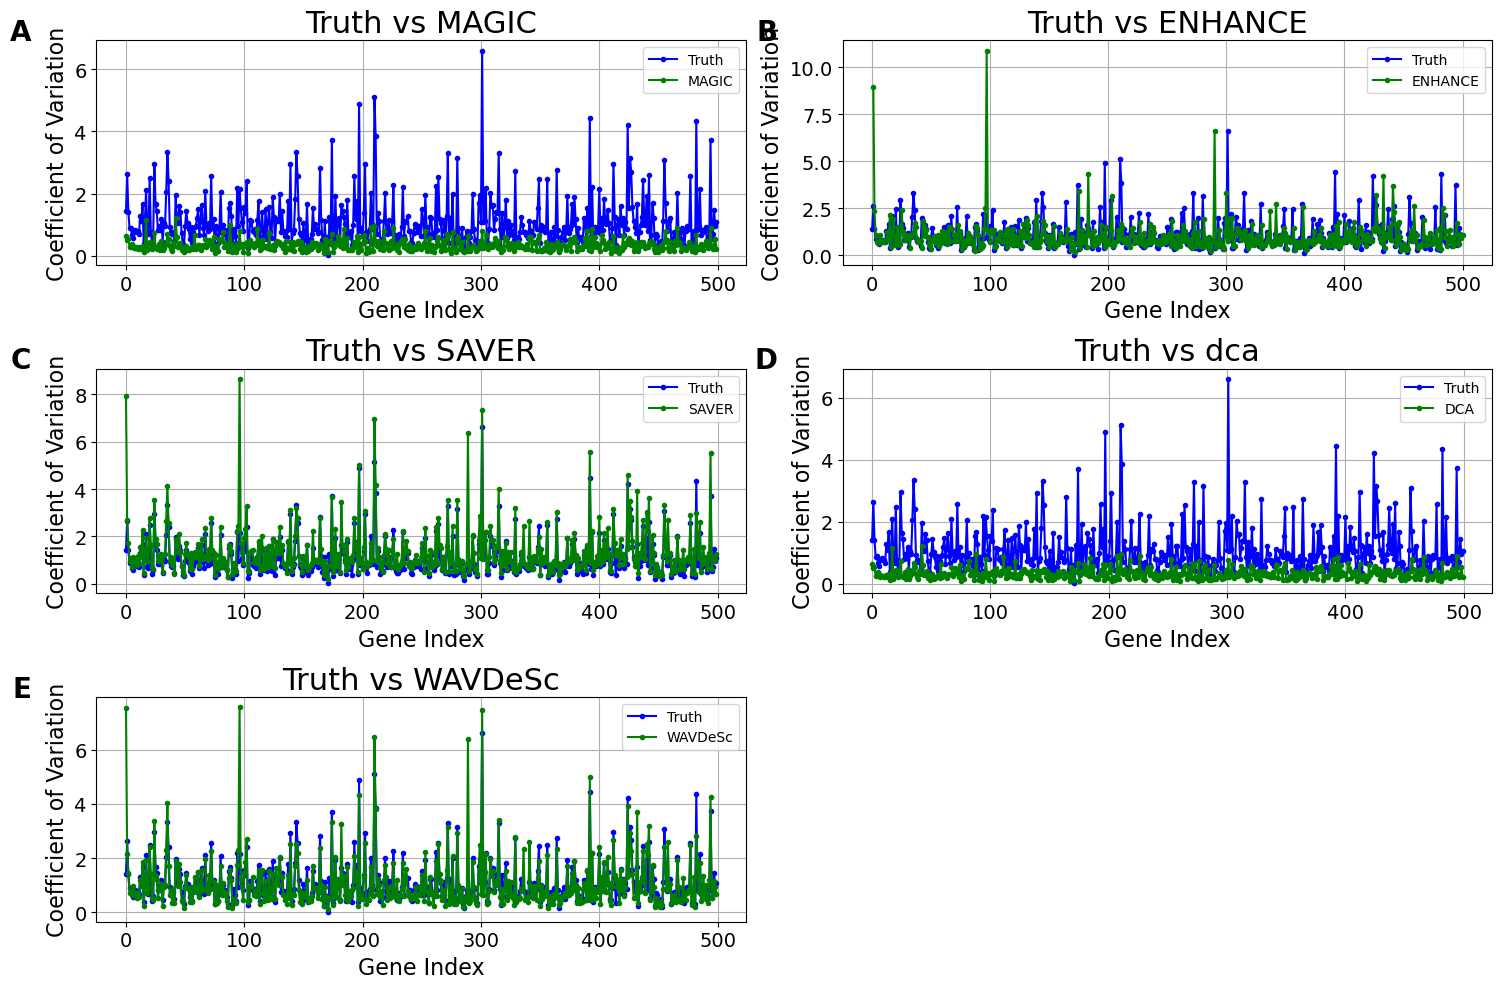

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# Define font sizes
title_fontsize = 22
label_fontsize = 16
tick_labelsize = 14

# Set the background color of the figure
#fig.patch.set_facecolor('grey')

# Set the background color of each subplot to grey
#for ax in axs.flat:
 #   ax.set_facecolor('lightgrey')  # Use 'lightgrey' for a lighter shade if preferred


# Labels for each subplot (in the order they are created)
labels = ['A', 'B', 'C', 'D','E']

# Plotting each dataset against Truth and adding labels
for i, ax in enumerate(axs.flat[:5]):
    ax.plot(A, label='Truth', marker='.', linestyle='-', color='blue')
    if i == 0:
        ax.plot(E, label='MAGIC', marker='.', linestyle='-', color='green')
        ax.set_title('Truth vs MAGIC', fontsize=title_fontsize)        
    elif i == 1:
        ax.plot(C, label='ENHANCE', marker='.', linestyle='-', color='green')
        ax.set_title('Truth vs ENHANCE', fontsize=title_fontsize)
    elif i == 2:
        ax.plot(D, label='SAVER', marker='.', linestyle='-', color='green')
        ax.set_title('Truth vs SAVER', fontsize=title_fontsize)
    elif i == 3:
        ax.plot(E, label='DCA', marker='.', linestyle='-', color='green')
        ax.set_title('Truth vs dca', fontsize=title_fontsize)
    elif i == 4:
        ax.plot(B, label='WAVDeSc', marker='.', linestyle='-', color='green')
        ax.set_title('Truth vs WAVDeSc', fontsize=title_fontsize)

    ax.set_xlabel('Gene Index', fontsize=label_fontsize)
    ax.set_ylabel('Coefficient of Variation', fontsize=label_fontsize)
    ax.tick_params(axis='both', labelsize=tick_labelsize)
    ax.legend()
    
   # Place the label outside the top-left corner of the subplot
    ax.text(-0.1, 1.1, labels[i], transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
    
# Adding labels and grid to each subplot
for ax in axs.flat:
    ax.set(xlabel='Gene Index', ylabel='Coefficient of Variation')
    ax.grid(True)

axs.flat[5].axis('off')


# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('Comparison_with_Truth.png')

# Display the plot
plt.show()


In [7]:
################# 500 by 300 cells UMI ###############

In [9]:
# Load data from a CSV file
Truth = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/Thesis/Final_datasets_used/Codes_WD/ttest_cv_500by300/Truth_umi.csv')

# Remove the first column by index (index 0)
Truth = Truth.drop(Truth.columns[0], axis=1)

WAVDesC = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/Thesis/Final_datasets_used/Codes_WD/ttest_cv_500by300/wavdescBior2.6_umi_500.csv',header=None)
print(WAVDesC.shape)

ENHANCE = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/Thesis/Final_datasets_used/Codes_WD/ttest_cv_500by300/enhance_umi_500.csv',header=None)
#print(ENHANCE.head())
ENHANCE = ENHANCE.drop(ENHANCE.columns[0], axis=1)
ENHANCE = ENHANCE.drop(index=0)
ENHANCE = ENHANCE.apply(pd.to_numeric, errors='coerce')
print(ENHANCE.shape)
#print(ENHANCE.head())
#print(type(ENHANCE))



SAVER = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/Thesis/Final_datasets_used/Codes_WD/ttest_cv_500by300/saver_umi_500.csv')
print(SAVER.shape)
SAVER = SAVER.apply(pd.to_numeric, errors='coerce')

#print(SAVER.head())


MAGIC = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/Thesis/Final_datasets_used/Codes_WD/ttest_cv_500by300/magic_umi_500.csv',header=None)
MAGIC = MAGIC.T
MAGIC.reset_index(drop=True, inplace=True)
MAGIC = MAGIC.iloc[1:]
MAGIC = MAGIC.apply(pd.to_numeric, errors='coerce')
MAGIC = MAGIC.drop(MAGIC.columns[0], axis=1)
print(MAGIC.shape)
#print(MAGIC.head())  # Display the first few rows to verify

DCA = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/Thesis/Final_datasets_used/Codes_WD/ttest_cv_500by300/dca_denoised_UMI.tsv',delimiter = '\t')
#print(ENHANCE.head())
DCA = DCA.drop(DCA.columns[0], axis=1)
#DCA = DCA.drop(index=0)
DCA = DCA.apply(pd.to_numeric, errors='coerce')
print(DCA.shape)
#print(ENHANCE.head())
print(type(DCA))



(500, 300)
(500, 300)
(500, 300)
(500, 300)
(500, 300)
<class 'pandas.core.frame.DataFrame'>


In [10]:
import numpy as np

def rowcvs(matrix):
    # Calculate the mean and standard deviation for each row
    means = np.mean(matrix, axis=1)
    stds = np.std(matrix, axis=1, ddof=1)  # ddof=1 for unbiased estimate
    
    # Calculate the coefficient of variation (CV)
    cvs = stds / means
    return cvs

In [11]:
F= rowcvs(Truth)
G =  rowcvs(WAVDesC)

H = rowcvs(ENHANCE)
I = rowcvs(SAVER)
J = rowcvs(MAGIC)
JJ = rowcvs(DCA)
print(JJ)

0      1.048890
1      1.321436
2      1.049161
3      0.735960
4      0.733178
         ...   
495    0.721017
496    0.698772
497    1.085523
498    1.121557
499    0.776057
Length: 500, dtype: float64


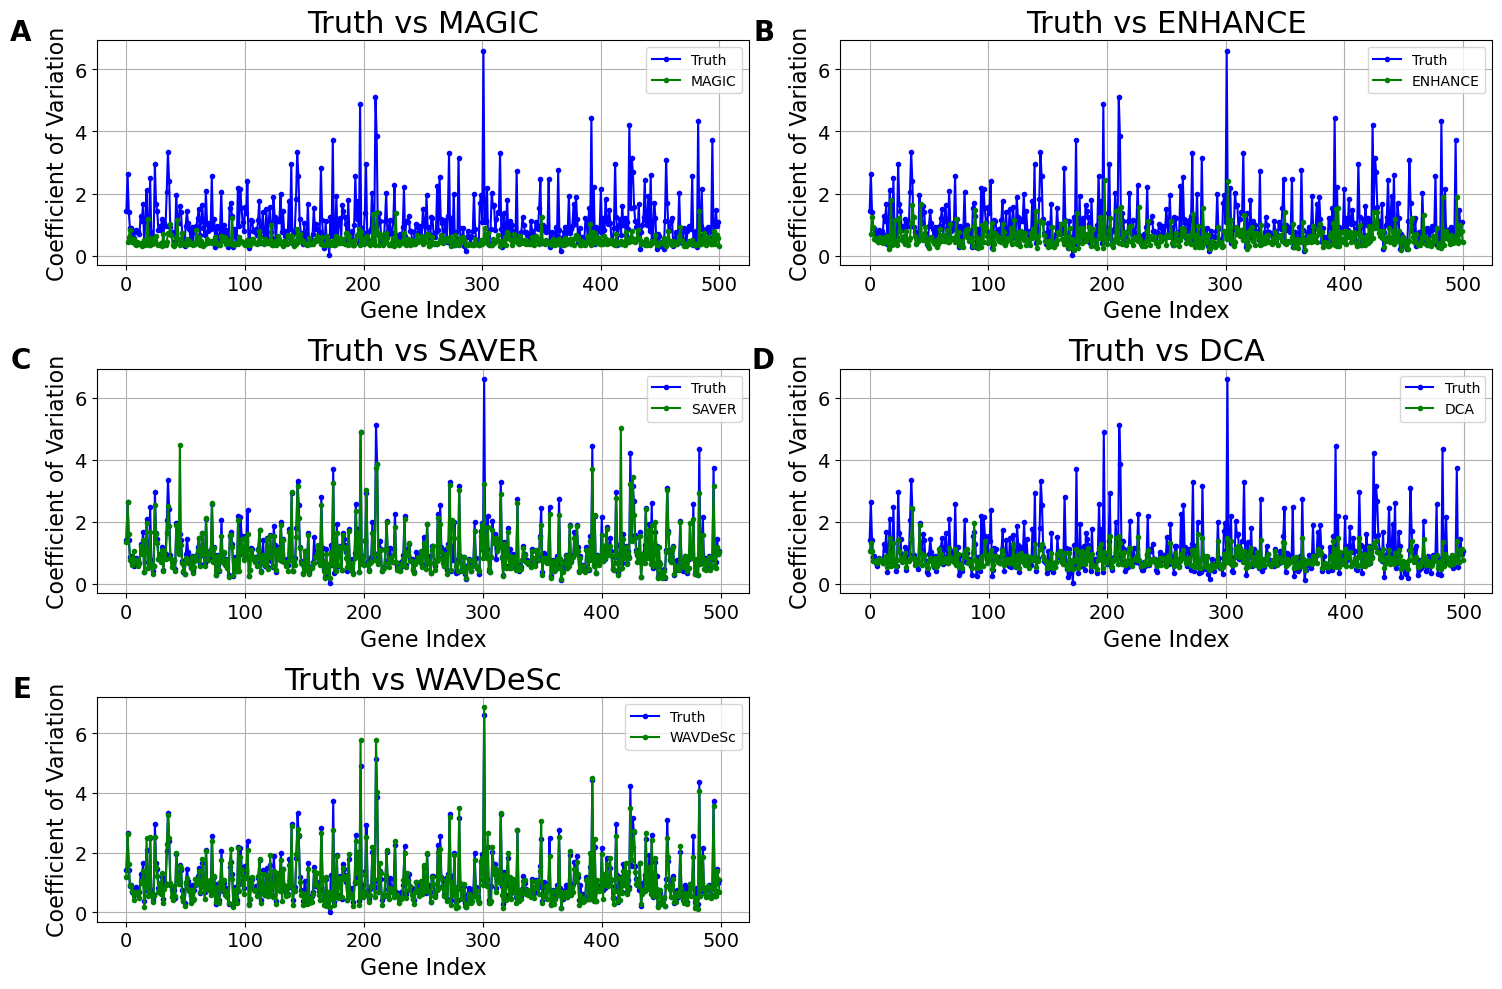

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# Define font sizes
title_fontsize = 22
label_fontsize = 16
tick_labelsize = 14

# Set the background color of the figure
#fig.patch.set_facecolor('grey')

# Set the background color of each subplot to grey
#for ax in axs.flat:
 #   ax.set_facecolor('lightgrey')  # Use 'lightgrey' for a lighter shade if preferred


# Labels for each subplot (in the order they are created)
labels = ['A', 'B', 'C', 'D', 'E']

# Plotting each dataset against Truth and adding labels
for i, ax in enumerate(axs.flat[:5]):
    ax.plot(F, label='Truth', marker='.', linestyle='-', color='blue')
    if i == 0:
         ax.plot(J, label='MAGIC', marker='.', linestyle='-', color='green')
         ax.set_title('Truth vs MAGIC', fontsize=title_fontsize)
    elif i == 1:
        ax.plot(H, label='ENHANCE', marker='.', linestyle='-', color='green')
        ax.set_title('Truth vs ENHANCE', fontsize=title_fontsize)
    elif i == 2:
        ax.plot(I, label='SAVER', marker='.', linestyle='-', color='green')
        ax.set_title('Truth vs SAVER', fontsize=title_fontsize)
    elif i == 3:
       ax.plot(JJ, label='DCA', marker='.', linestyle='-', color='green')
       ax.set_title('Truth vs DCA', fontsize=title_fontsize)
    elif i == 4:
       ax.plot(G, label='WAVDeSc', marker='.', linestyle='-', color='green')
       ax.set_title('Truth vs WAVDeSc', fontsize=title_fontsize)

    ax.set_xlabel('Gene Index', fontsize=label_fontsize)
    ax.set_ylabel('Coefficient of Variation', fontsize=label_fontsize)
    ax.tick_params(axis='both', labelsize=tick_labelsize)
    ax.legend()
    
   # Place the label outside the top-left corner of the subplot
    ax.text(-0.1, 1.1, labels[i], transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
    
# Adding labels and grid to each subplot
for ax in axs.flat:
    ax.set(xlabel='Gene Index', ylabel='Coefficient of Variation')
    ax.grid(True)

axs.flat[5].axis('off')
    
# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('UMI_500_Comparison_with_Truth.png')

# Display the plot
plt.show()


In [13]:
################# 5000 by 1000 cells nonUMI ###############

In [14]:
# Load data from a CSV file and compute for  CV

In [17]:
Truth3 = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/Thesis/Final_datasets_used/Codes_WD/ttest_cv_5000by1000/Truth_1000.csv')
print(Truth3.shape)
K= rowcvs(Truth3)
print(K)


WAVDesC3 = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/Thesis/Final_datasets_used/Codes_WD/ttest_cv_5000by1000/denoised_bior1000_nonUMI.csv',header=None)
print(WAVDesC3.shape)
L =  rowcvs(WAVDesC3)
print(L)

ENHANCE3 = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/Thesis/Final_datasets_used/Codes_WD/ttest_cv_5000by1000/denoised_enhance1000_nonUMI.csv')
#ENHANCE3 = ENHANCE3.drop(ENHANCE3.columns[0], axis=1)
#ENHANCE3 = ENHANCE3.drop(index=0)
ENHANCE3 = ENHANCE3.apply(pd.to_numeric, errors='coerce')
print(ENHANCE3.shape)

M = rowcvs(ENHANCE3)
print(M)

SAVER3 = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/Thesis/Final_datasets_used/Codes_WD/ttest_cv_5000by1000/denoised_saver1000_nonUMI.csv')
print(SAVER3.shape)
N = rowcvs(SAVER3)
print(N)

MAGIC = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/Thesis/Final_datasets_used/Codes_WD/ttest_cv_5000by1000/denoised_magic1000_nonUMI.csv',header=None)
MAGIC = MAGIC.T
MAGIC.reset_index(drop=True, inplace=True)
MAGIC = MAGIC.iloc[1:]
MAGIC = MAGIC.apply(pd.to_numeric, errors='coerce')
MAGIC = MAGIC.drop(MAGIC.columns[0], axis=1)
print(MAGIC.shape)


O = rowcvs(MAGIC)
print(O)


DCA = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/Thesis/Final_datasets_used/Codes_WD/ttest_cv_5000by1000/denoised_dca1000_nonUMI.tsv',delimiter='\t')
DCA = DCA.drop(DCA.columns[0], axis=1)
#ENHANCE3 = ENHANCE3.drop(index=0)
DCA = DCA.apply(pd.to_numeric, errors='coerce')
print(DCA.shape)
#print(DCA.head)


P = rowcvs(DCA)
print(P)




(5000, 1000)
0       1.415872
1       2.682577
2       0.993076
3       1.232613
4       0.793732
          ...   
4995    3.925646
4996    0.807567
4997    1.213550
4998    1.335444
4999    0.791788
Length: 5000, dtype: float64
(5000, 1000)
0       1.442537
1       2.600125
2       1.543809
3       1.483027
4       0.685293
          ...   
4995    3.653865
4996    0.569840
4997    0.905491
4998    1.064967
4999    0.574257
Length: 5000, dtype: float64
(5000, 1000)
0       0.953066
1       1.243569
2       1.161114
3       1.017079
4       0.732581
          ...   
4995    1.191643
4996    0.411419
4997    0.863791
4998    1.079742
4999    0.662789
Length: 5000, dtype: float64
(5000, 1000)
0       1.805769
1       3.131497
2       1.714843
3       1.522151
4       1.103219
          ...   
4995    4.394191
4996    0.986616
4997    1.193195
4998    1.579852
4999    0.705205
Length: 5000, dtype: float64


/tmp/ipykernel_42584/738568445.py:26: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262

(5000, 1000)
1       0.281085
2       0.691351
3       0.426732
4       0.795408
5       0.300726
          ...   
4996    0.618762
4997    0.153759
4998    0.393794
4999    0.311673
5000    0.492043
Length: 5000, dtype: float64
(4985, 1000)
0       0.320526
1       0.623982
2       0.374550
3       0.752711
4       0.424100
          ...   
4980    0.330374
4981    0.160017
4982    0.449113
4983    0.541743
4984    0.561116
Length: 4985, dtype: float64


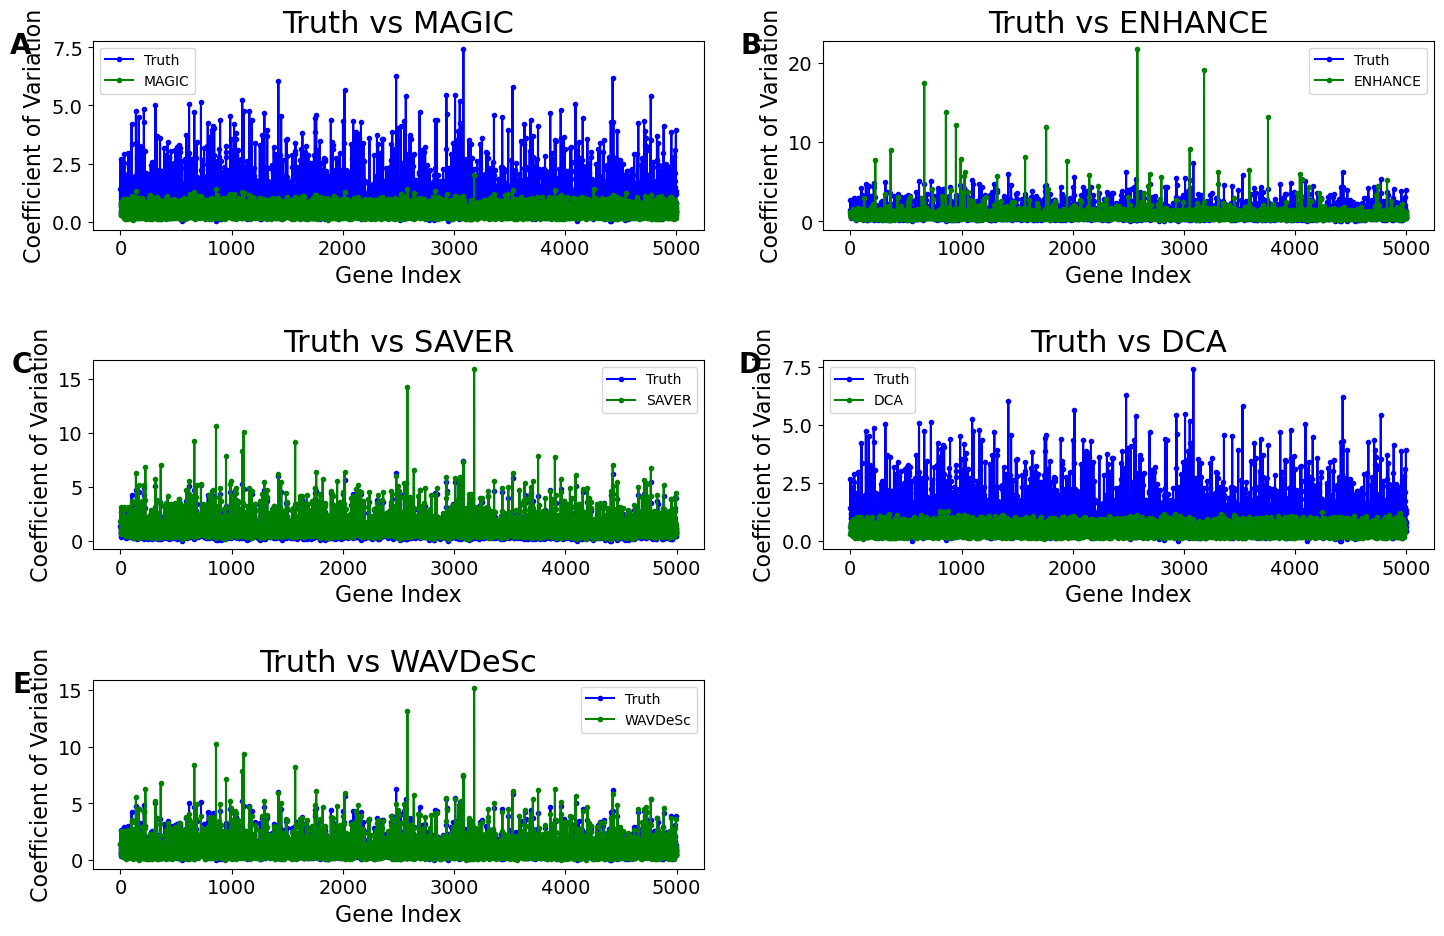

In [18]:

import numpy as np
import matplotlib.pyplot as plt

# Create a figure and a set of subplots (2 rows and 3 columns)
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# Define font sizes
title_fontsize = 22
label_fontsize = 16
tick_labelsize = 14

# Labels for each subplot (in the order they are created)
labels = ['A', 'B', 'C', 'D', 'E']

# Plotting each dataset against Truth and adding labels
for i, ax in enumerate(axs.flat[:5]):  # Use only the first 5 axes
    ax.plot(K, label='Truth', marker='.', linestyle='-', color='blue')
    
    # Customizing individual subplots
    if i == 0:
        ax.plot(O, label='MAGIC', marker='.', linestyle='-', color='green')
        ax.set_title('Truth vs MAGIC', fontsize=title_fontsize)
    elif i == 1:
        ax.plot(M, label='ENHANCE', marker='.', linestyle='-', color='green')
        ax.set_title('Truth vs ENHANCE', fontsize=title_fontsize)
    elif i == 2:
        ax.plot(N, label='SAVER', marker='.', linestyle='-', color='green')
        ax.set_title('Truth vs SAVER', fontsize=title_fontsize)
    elif i == 3:
        ax.plot(P, label='DCA', marker='.', linestyle='-', color='green')
        ax.set_title('Truth vs DCA', fontsize=title_fontsize)
    elif i == 4:
        ax.plot(L, label='WAVDeSc', marker='.', linestyle='-', color='green')
        ax.set_title('Truth vs WAVDeSc', fontsize=title_fontsize)
    
    # Adding the labels to each subplot
    ax.text(-0.1, 1.05, labels[i], transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
    ax.set_xlabel('Gene Index', fontsize=label_fontsize)
    ax.set_ylabel('Coefficient of Variation', fontsize=label_fontsize)
    ax.tick_params(axis='both', labelsize=tick_labelsize)
    ax.legend()

# Turn off the empty 6th subplot
axs.flat[5].axis('off')

# Adjust layout and display
plt.tight_layout(pad=3.0)
plt.savefig('nonUMI_1000_Comparison_with_Truth.png')
plt.show()


In [19]:
################# 5000 by 1000 cells UMI ###############

In [20]:
# Load data from a CSV file and compute for  CV

In [22]:
import pandas as pd

import numpy as np

def rowcvs(matrix):
    # Calculate the mean and standard deviation for each row
    means = np.mean(matrix, axis=1)
    stds = np.std(matrix, axis=1, ddof=1)  # ddof=1 for unbiased estimate
    
    # Calculate the coefficient of variation (CV)
    cvs = stds / means
    return cvs


Truth4 = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/Thesis/Final_datasets_used/Codes_WD/ttest_cv_5000by1000/Truth_1000.csv')
print(Truth4.shape)
P= rowcvs(Truth4)
#print(P)

WAVDesC4 = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/Thesis/Final_datasets_used/Codes_WD/ttest_cv_5000by1000/UMI_bior1000.csv',header=None)
print(WAVDesC4.shape)
Q =  rowcvs(WAVDesC4)
#print(Q)

ENHANCE4 = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/Thesis/Final_datasets_used/Codes_WD/ttest_cv_5000by1000/UMI_enhance1000.csv')
ENHANCE4 = ENHANCE4.drop(ENHANCE4.columns[0], axis=1)
ENHANCE = ENHANCE4.drop(index=0)
ENHANCE = ENHANCE.apply(pd.to_numeric, errors='coerce')
#print(ENHANCE4.shape)

R = rowcvs(ENHANCE4)
#print(R)

SAVER4 = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/Thesis/Final_datasets_used/Codes_WD/ttest_cv_5000by1000/UMI_saver1000.csv')
print(SAVER4.shape)
S = rowcvs(SAVER4)
#print(S)

MAGIC4 = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/Thesis/Final_datasets_used/Codes_WD/ttest_cv_5000by1000/UMI_magic1000.csv',header=None)
MAGIC4 = MAGIC4.T
MAGIC4.reset_index(drop=True, inplace=True)
MAGIC4 = MAGIC4.iloc[1:]
MAGIC4 = MAGIC4.apply(pd.to_numeric, errors='coerce')
MAGIC4 = MAGIC4.drop(MAGIC4.columns[0], axis=1)
#print(MAGIC4.shape)


T = rowcvs(MAGIC4)
#print(T)

DCA4 = pd.read_csv('/home/isabel/Desktop/Thesis_publications_researchPapers/Thesis/Final_datasets_used/Codes_WD/ttest_cv_5000by1000/UMI_dca1000.tsv', delimiter='\t')
DCA4 = DCA4.drop(DCA4.columns[0], axis=1)
#DCA = DCA4.drop(index=0)
DCA4 = DCA4.apply(pd.to_numeric, errors='coerce')
print(DCA4.shape)

Z = rowcvs(DCA4)
print(Z)

(5000, 1000)
(5000, 1000)
(5000, 1000)


/tmp/ipykernel_42584/3633289661.py:39: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,26

(5000, 1000)
0       0.874519
1       1.240934
2       0.564294
3       0.922437
4       0.617776
          ...   
4995    1.118270
4996    0.451162
4997    1.002615
4998    1.022570
4999    0.915669
Length: 5000, dtype: float64


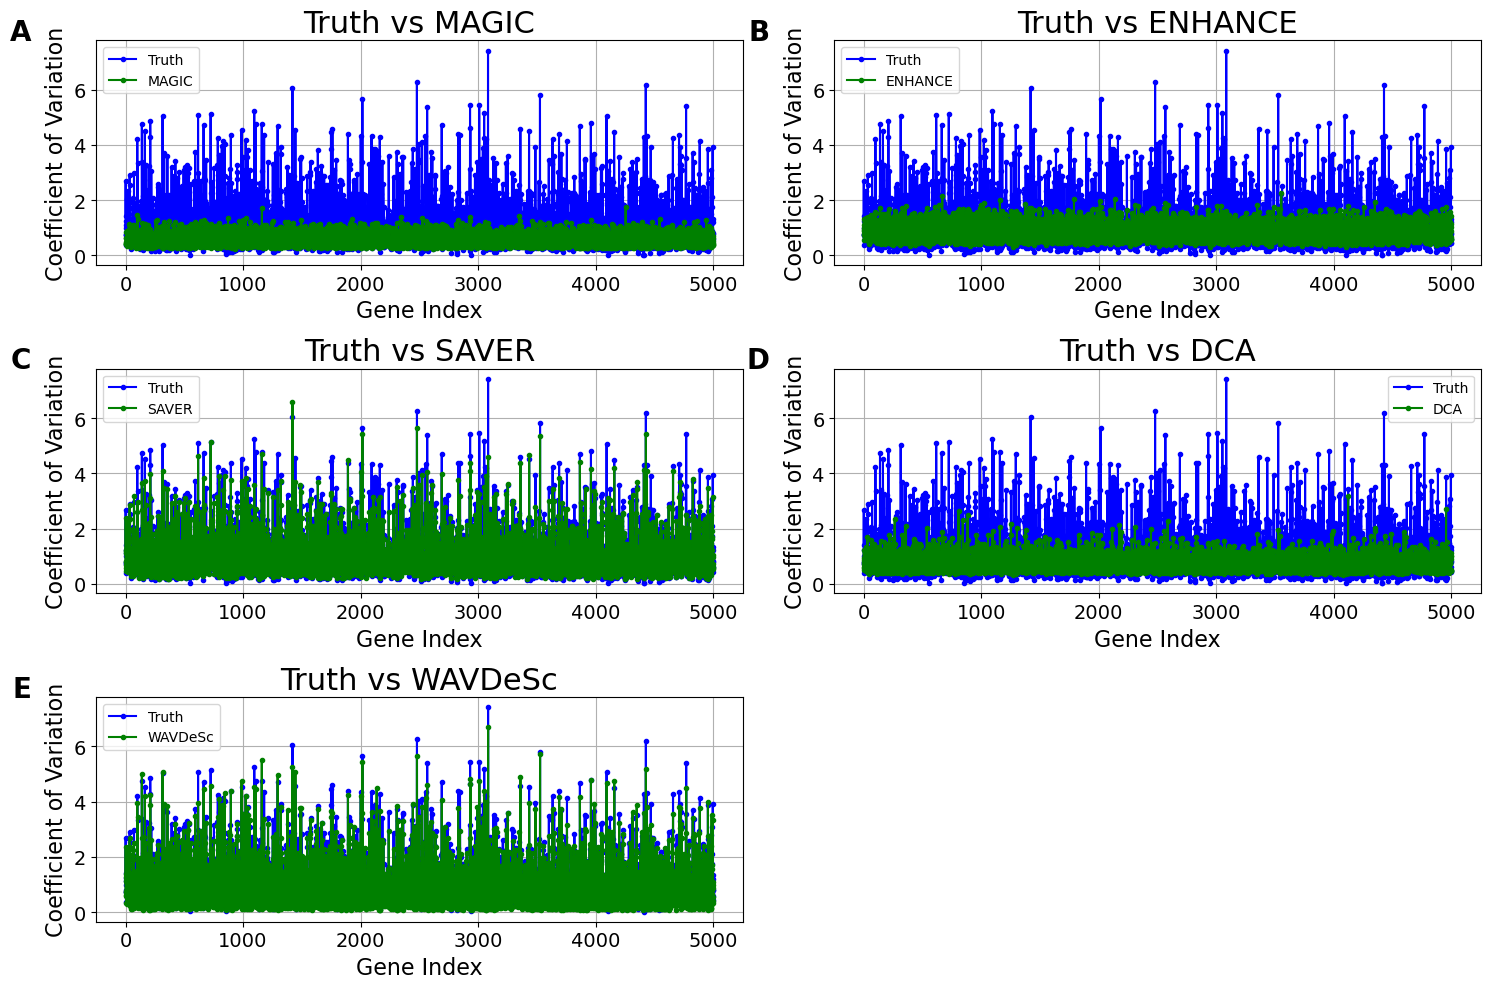

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axs = plt.subplots(3,2, figsize=(15, 10))

# Define font sizes
title_fontsize = 22
label_fontsize = 16
tick_labelsize = 14

# Set the background color of the figure
#fig.patch.set_facecolor('grey')

# Set the background color of each subplot to grey
#for ax in axs.flat:
 #   ax.set_facecolor('lightgrey')  # Use 'lightgrey' for a lighter shade if preferred


# Labels for each subplot (in the order they are created)
labels = ['A', 'B', 'C', 'D','E']

# Plotting each dataset against Truth and adding labels
for i, ax in enumerate(axs.flat[:5]):
    ax.plot(P, label='Truth', marker='.', linestyle='-', color='blue')
    if i == 0:
        ax.plot(T, label='MAGIC', marker='.', linestyle='-', color='green')
        ax.set_title('Truth vs MAGIC', fontsize=title_fontsize)
    elif i == 1:
        ax.plot(R, label='ENHANCE', marker='.', linestyle='-', color='green')
        ax.set_title('Truth vs ENHANCE', fontsize=title_fontsize)
    elif i == 2:
        ax.plot(S, label='SAVER', marker='.', linestyle='-', color='green')
        ax.set_title('Truth vs SAVER', fontsize=title_fontsize)
    elif i == 3:
        ax.plot(Z, label='DCA', marker='.', linestyle='-', color='green')
        ax.set_title('Truth vs DCA', fontsize=title_fontsize) 
    elif i == 4:
        ax.plot(Q, label='WAVDeSc', marker='.', linestyle='-', color='green')
        ax.set_title('Truth vs WAVDeSc', fontsize=title_fontsize)
        
        
    ax.set_xlabel('Gene Index', fontsize=label_fontsize)
    ax.set_ylabel('Coefficient of Variation', fontsize=label_fontsize)
    ax.tick_params(axis='both', labelsize=tick_labelsize)
    ax.legend()
    
   # Place the label outside the top-left corner of the subplot
    ax.text(-0.1, 1.1, labels[i], transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
    
# Adding labels and grid to each subplot
for ax in axs.flat:
    ax.set(xlabel='Gene Index', ylabel='Coefficient of Variation')
    ax.grid(True)
    
# Adjust layout
plt.tight_layout()


axs.flat[5].axis('off')
# Save the plot
plt.savefig('UMI_1000_Comparison_with_Truth.png')

# Display the plot
plt.show()

In [24]:
##### compile all graphs

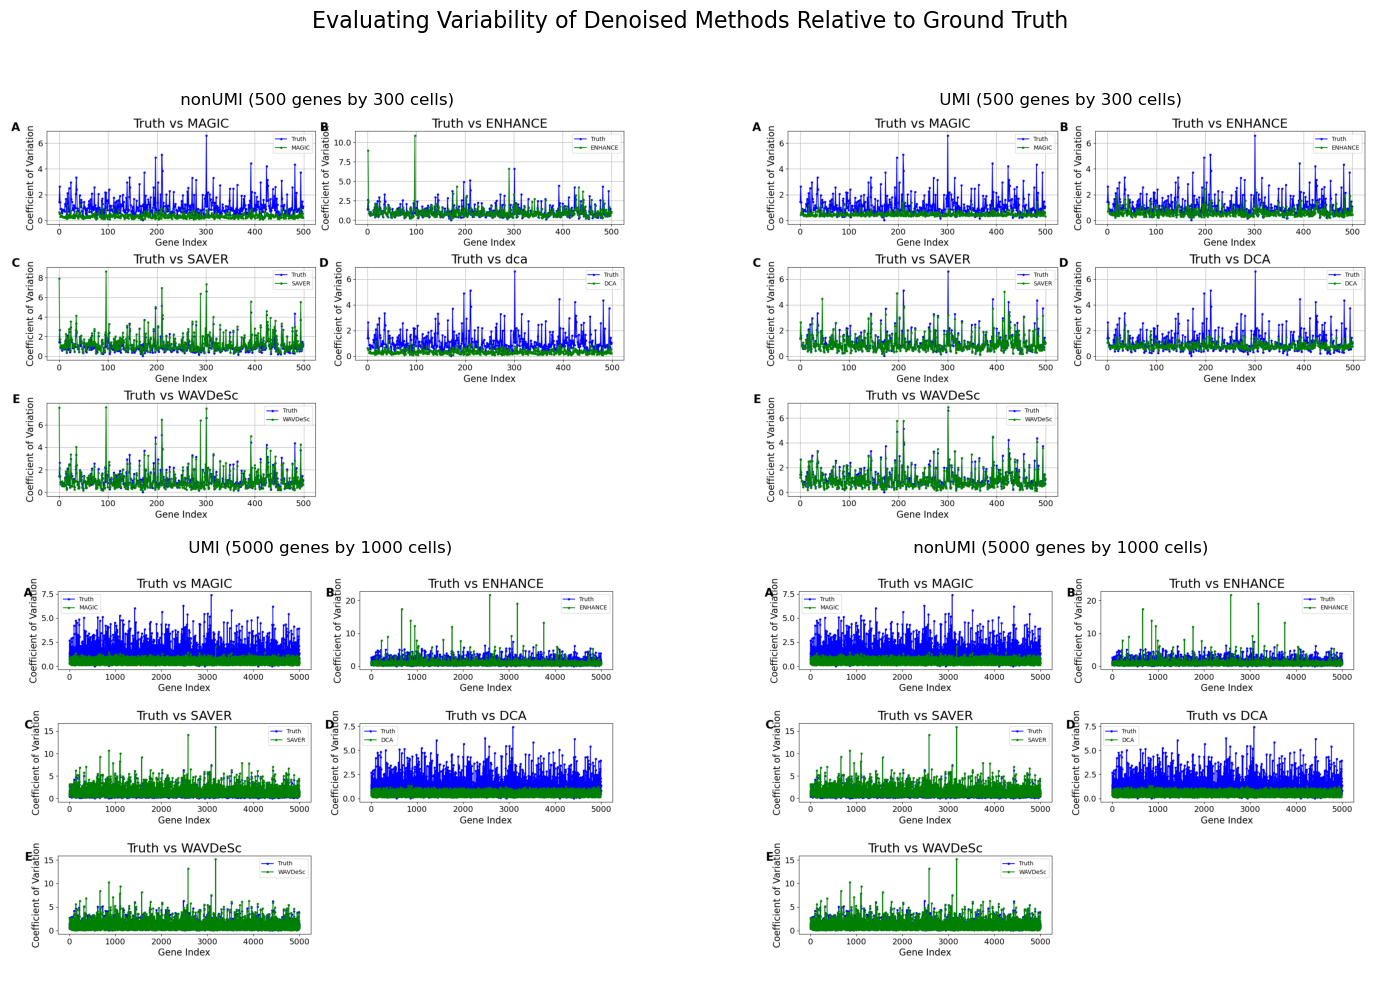

In [26]:
import matplotlib.pyplot as plt

# Load your subplot images
img_A = plt.imread('/home/isabel/Desktop/Thesis_publications_researchPapers/PYTHON_P1/Results/Comparison_with_Truth.png')
img_B = plt.imread('/home/isabel/Desktop/Thesis_publications_researchPapers/PYTHON_P1/Results/UMI_500_Comparison_with_Truth.png')
img_C = plt.imread('/home/isabel/Desktop/Thesis_publications_researchPapers/PYTHON_P1/Results/nonUMI_1000_Comparison_with_Truth.png')
img_D = plt.imread('/home/isabel/Desktop/Thesis_publications_researchPapers/PYTHON_P1/Results/nonUMI_1000_Comparison_with_Truth.png')

# Create a figure to hold the subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Assign images to subplots
axs[0, 0].imshow(img_A)
axs[0, 0].set_title(' nonUMI (500 genes by 300 cells)  ')
axs[0, 0].axis('off')  # Turn off axis

axs[0, 1].imshow(img_B)
axs[0, 1].set_title(' UMI (500 genes by 300 cells) ')
axs[0, 1].axis('off')

axs[1, 0].imshow(img_C)
axs[1, 0].set_title(' UMI (5000 genes by 1000 cells) ')
axs[1, 0].axis('off')

axs[1, 1].imshow(img_D)
axs[1, 1].set_title(' nonUMI (5000 genes by 1000 cells) ')
axs[1, 1].axis('off')

# Set the overall title for the figure
plt.suptitle('Evaluating Variability of Denoised Methods Relative to Ground Truth', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect to make space for the title

# Save or show the figure
plt.savefig('compiled_image.png')
plt.show()
